In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("ai_job_data.csv")

# Data Cleaning and Preparation - removing duplicate rows
df.drop_duplicates(inplace=True)

# Convert salary_usd to numeric - tranforming salary_usd to numeric type
df["salary_usd"] = pd.to_numeric(df["salary_usd"])

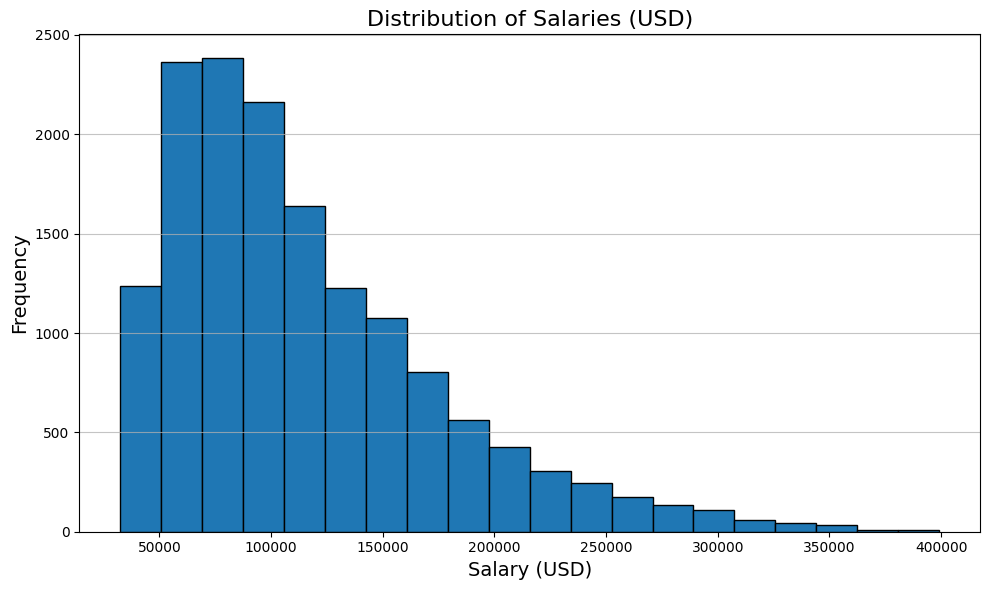

In [2]:
# 1. Histogram of Salary_USD
plt.figure(figsize=(10, 6))
plt.hist(df["salary_usd"], bins=20, edgecolor="black", color="#1f77b4")
plt.title("Distribution of Salaries (USD)", fontsize=16)
plt.xlabel("Salary (USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", alpha=0.75)
plt.tight_layout()
plt.show()

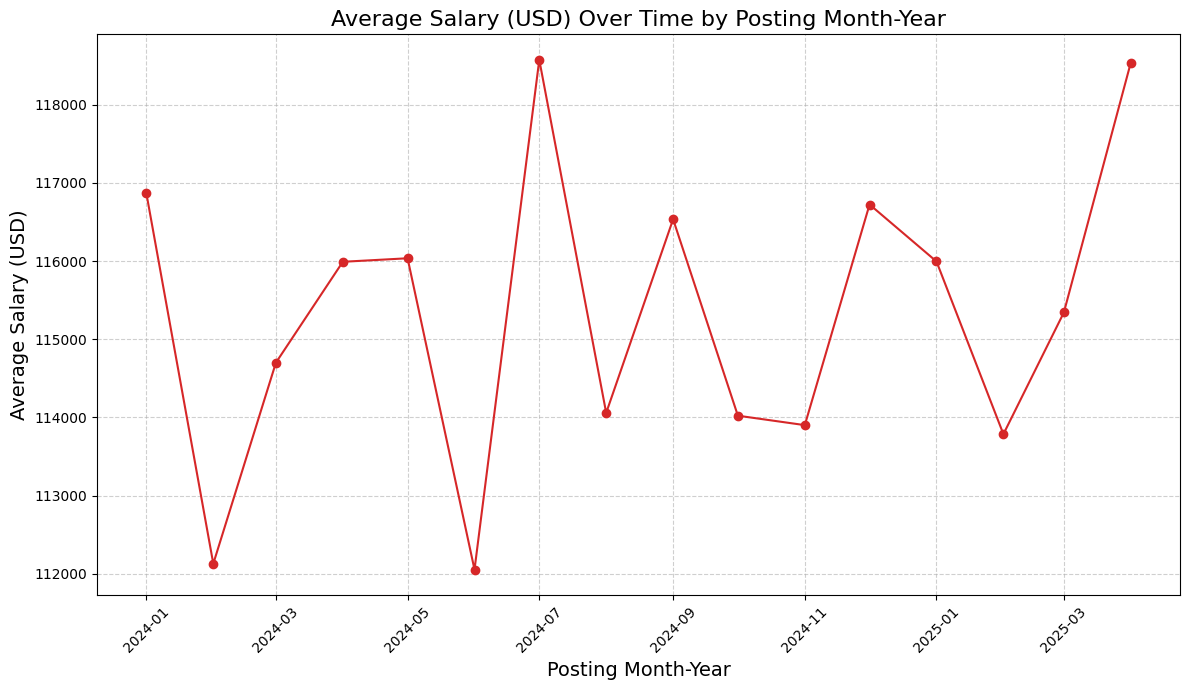

In [3]:
# Convert 'posting_date' to datetime
df["posting_date"] = pd.to_datetime(df["posting_date"])

# Extract month and year from 'posting_date' and create a new column for plotting
df["posting_month_year"] = df["posting_date"].dt.to_period("M")

# Group by 'posting_month_year' and calculate the average salary
avg_salary_by_month_year = (
    df.groupby("posting_month_year")["salary_usd"].mean().reset_index()
)

# Convert 'posting_month_year' back to datetime for proper plotting
avg_salary_by_month_year["posting_month_year"] = avg_salary_by_month_year[
    "posting_month_year"
].dt.to_timestamp()

# Sort the data by date
avg_salary_by_month_year = avg_salary_by_month_year.sort_values(by="posting_month_year")

# Line graph of average salary per posting month-year
plt.figure(figsize=(12, 7))
plt.plot(
    avg_salary_by_month_year["posting_month_year"],
    avg_salary_by_month_year["salary_usd"],
    marker="o",
    linestyle="-",
    color="#d62728",
)
plt.title("Average Salary (USD) Over Time by Posting Month-Year", fontsize=16)
plt.xlabel("Posting Month-Year", fontsize=14)
plt.ylabel("Average Salary (USD)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

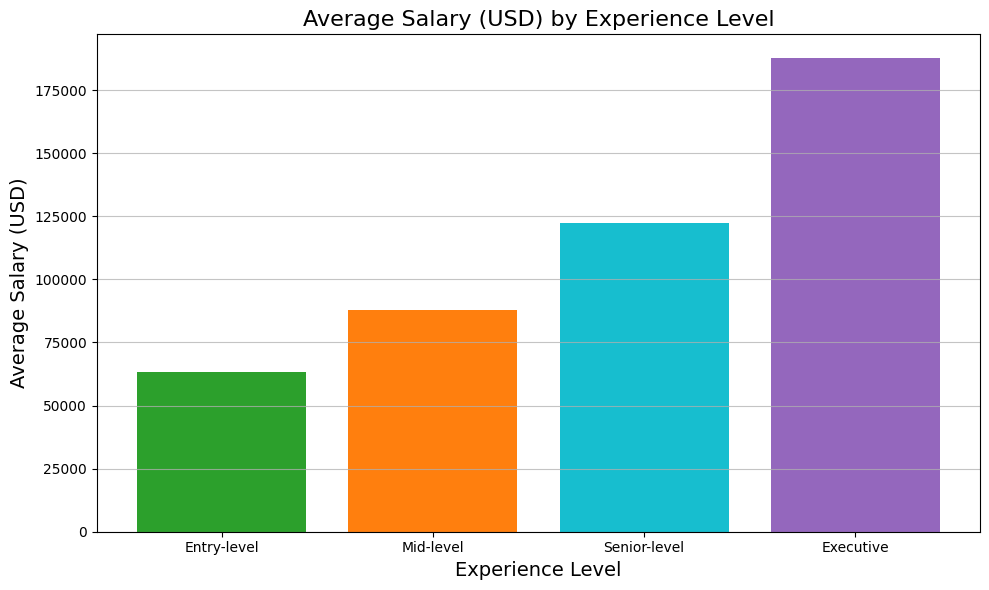

In [4]:
# 3. Bar plot of average salary by experience level
avg_salary_by_experience = (
    df.groupby("experience_level_full")["salary_usd"]
    .mean()
    .reindex(["Entry-level", "Mid-level", "Senior-level", "Executive"])
    .reset_index()
)
plt.figure(figsize=(10, 6))
plt.bar(
    avg_salary_by_experience["experience_level_full"],
    avg_salary_by_experience["salary_usd"],
    color=["#2ca02c", "#ff7f0e", "#17becf", "#9467bd"],
)
plt.title("Average Salary (USD) by Experience Level", fontsize=16)
plt.xlabel("Experience Level", fontsize=14)
plt.ylabel("Average Salary (USD)", fontsize=14)
plt.grid(axis="y", alpha=0.75)
plt.tight_layout()
plt.show()